# Registro de Servidores Públicos Sancionados (RSPS) - SFP 

## El número de Servidores Públicos sancionados por Dependencia de Gobierno son un indicador del posible nivel de corrupción de las mismas.

## Esto se puede investigar al analizar las Causas de Sanción de los Servidores y cuantificar aquellas que pueden ser consideradas como Actos de Corrupción acorde a la ONU y como faltas a las Leyes Mexicanas.

## Así también, es posible encontrar correlaciones al ejecutar un cruce con el Directorio de Proveedores y Contratistas sancionados (DSPC) - SFP. 

### Importar data frame

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

In [29]:
df =  pd.read_csv('sanciones.csv',encoding = "ISO-8859-1")

In [30]:
df.head()

,Expediente,Fecha Resolucion,Servidor Publico,Autoridad,Dependencia,Sancion Impuesta,Inicio,Fin,Monto,Causa,Unnamed: 10
0,000001/2018,2018-07-31,RAUL CARDOSO MONTILLA,ORGANO INTERNO DE CONTROL,INSTITUTO MEXICANO DEL PETROLEO,INHABILITACION,2018-08-02,2019-02-02,NaN,INCUMPLIMIENTO EN DECLARACION DE SITUACION PAT...,NaN
1,000003/2016,2018-08-17,CIRILO VICTORIA RODRIGUEZ,ORGANO INTERNO DE CONTROL,INSTITUTO NACIONAL DE PEDIATRIA,INHABILITACION,2018-08-31,2023-08-31,NaN,NEGLIGENCIA ADMINISTRATIVA,NaN
2,000003/2016,2018-08-17,GABRIEL DELGADO VALDIVIESO,ORGANO INTERNO DE CONTROL,INSTITUTO NACIONAL DE PEDIATRIA,INHABILITACION,2018-08-29,2023-08-29,NaN,NEGLIGENCIA ADMINISTRATIVA,NaN
3,000004/2017,2018-11-14,ROBERTO MANUEL REYES GRANADOS,ORGANO INTERNO DE CONTROL,TALLERES GRAFICOS DE MEXICO,INHABILITACION,2018-11-27,2028-11-27,NaN,OTRAS,NaN
4,000004/2018,2018-09-07,NAYELY YOLOTZIN CEDILLO NAJERA,ORGANO INTERNO DE CONTROL,INSTITUTO NACIONAL DE CANCEROLOGIA,INHABILITACION,2018-09-07,2018-12-07,NaN,OTRAS,NaN


## Explorar las tablas Autoridad, Sanción, Causa, Servidor Público y Dependencia

# Autoridad

### Descripción de tabla

In [42]:
df['Autoridad'].describe()

count                          2455
unique                            4
top       ORGANO INTERNO DE CONTROL
freq                           2417
Name: Autoridad, dtype: object

### Top values

In [43]:
df['Autoridad'].value_counts().head(10)

ORGANO INTERNO DE CONTROL                                               2417
DIRECCION GENERAL DE RESPONSABILIDADES Y SITUACION PATRIMONIAL (SFP)      29
SFP (CONTRALORIA INTERNA)                                                  8
SECRETARIA DE LA FUNCION PUBLICA                                           1
Name: Autoridad, dtype: int64

# Sanción

### Descripción de tabla

In [45]:
df['Sancion Impuesta'].describe()

count               2455
unique                 1
top       INHABILITACION
freq                2455
Name: Sancion Impuesta, dtype: object

## Causa

### Descripción de tabla

In [46]:
df['Causa'].describe()

count                           2455
unique                            12
top       NEGLIGENCIA ADMINISTRATIVA
freq                            1429
Name: Causa, dtype: object

### Top values

In [47]:
df['Causa'].value_counts().head(12)

NEGLIGENCIA ADMINISTRATIVA                                   1429
ABUSO DE AUTORIDAD                                            275
INCUMPLIMIENTO EN DECLARACION DE SITUACION PATRIMONIAL        257
VIOLACION LEYES Y NORMATIVIDAD PRESUPUESTAL                   175
VIOLACION PROCEDIMIENTOS DE CONTRATACION                      108
COHECHO O EXTORSION                                            99
EJERCICIO INDEBIDO DE SUS FUNCIONES EN MATERIA MIGRATORIA      64
OTRAS                                                          41
VIOLACIîN A LOS DERECHOS HUMANOS                                4
016.58                                                          1
001.00                                                          1
201.12                                                          1
Name: Causa, dtype: int64

In [51]:
df['Causa'].value_counts(normalize=True).head(12)

NEGLIGENCIA ADMINISTRATIVA                                   0.582077
ABUSO DE AUTORIDAD                                           0.112016
INCUMPLIMIENTO EN DECLARACION DE SITUACION PATRIMONIAL       0.104684
VIOLACION LEYES Y NORMATIVIDAD PRESUPUESTAL                  0.071283
VIOLACION PROCEDIMIENTOS DE CONTRATACION                     0.043992
COHECHO O EXTORSION                                          0.040326
EJERCICIO INDEBIDO DE SUS FUNCIONES EN MATERIA MIGRATORIA    0.026069
OTRAS                                                        0.016701
VIOLACIîN A LOS DERECHOS HUMANOS                             0.001629
016.58                                                       0.000407
001.00                                                       0.000407
201.12                                                       0.000407
Name: Causa, dtype: float64

# Acorde la Convención de NU Contra la Corrupción las siguientes causas de sanción son considerados actos de corrupción en México y faltas a la Ley General de Responsabilidades Administrativas: 

# Sanciones NO-GRAVES:
## Negligencia (Art. 50) - 1429
## Incumplimiento de Declaraciones de Situación Patrimonial y de Interéses (Art. 49) - 257

# Sanciones GRAVES: 
## Abuso de Autoridad (Art. 57) (Art. 215 CPF) - 275
## Violaciones de leyes presupuestales (Art. 54) (Art. 114 LFPRH) - 175
## Contratación indebida  (Art. 59) - 108
## Coecho o Extorsión (Art. 52) - 99
## Ejercicio indebido de funciones (Art. 57) (Art. 140 LM) - 64



# Dependencia

### Descripción de tabla

In [39]:
df['Dependencia'].describe()

count                2455
unique                172
top       POLICIA FEDERAL
freq                  225
Name: Dependencia, dtype: object

### Top values

In [58]:
df['Dependencia'].value_counts().head(10)

POLICIA FEDERAL                                                          225
INSTITUTO MEXICANO DEL SEGURO SOCIAL (IMSS)                              157
COMISION FEDERAL DE ELECTRICIDAD                                         131
SECRETARIA DE EDUCACION PUBLICA                                          121
INSTITUTO NACIONAL DE MIGRACION                                          120
TELECOMUNICACIONES DE MEXICO (TELECOMM)                                  113
INSTITUTO DE SEGURIDAD Y SERVICIOS SOCIALES DE LOS TRABAJADO              85
SUPERISSSTE                                                               84
ADMINISTRACION FEDERAL DE SERVICIOS EDUCATIVOS EN EL DISTRITO FEDERAL     83
FIDEICOMISO FONDO NACIONAL DE HABITACIONES POPULARES                      83
Name: Dependencia, dtype: int64

In [57]:
df['Dependencia'].value_counts(normalize=True).head(10)

POLICIA FEDERAL                                                          0.091650
INSTITUTO MEXICANO DEL SEGURO SOCIAL (IMSS)                              0.063951
COMISION FEDERAL DE ELECTRICIDAD                                         0.053360
SECRETARIA DE EDUCACION PUBLICA                                          0.049287
INSTITUTO NACIONAL DE MIGRACION                                          0.048880
TELECOMUNICACIONES DE MEXICO (TELECOMM)                                  0.046029
INSTITUTO DE SEGURIDAD Y SERVICIOS SOCIALES DE LOS TRABAJADO             0.034623
SUPERISSSTE                                                              0.034216
ADMINISTRACION FEDERAL DE SERVICIOS EDUCATIVOS EN EL DISTRITO FEDERAL    0.033809
FIDEICOMISO FONDO NACIONAL DE HABITACIONES POPULARES                     0.033809
Name: Dependencia, dtype: float64

### Histograma

<function matplotlib.pyplot.show(*args, **kw)>

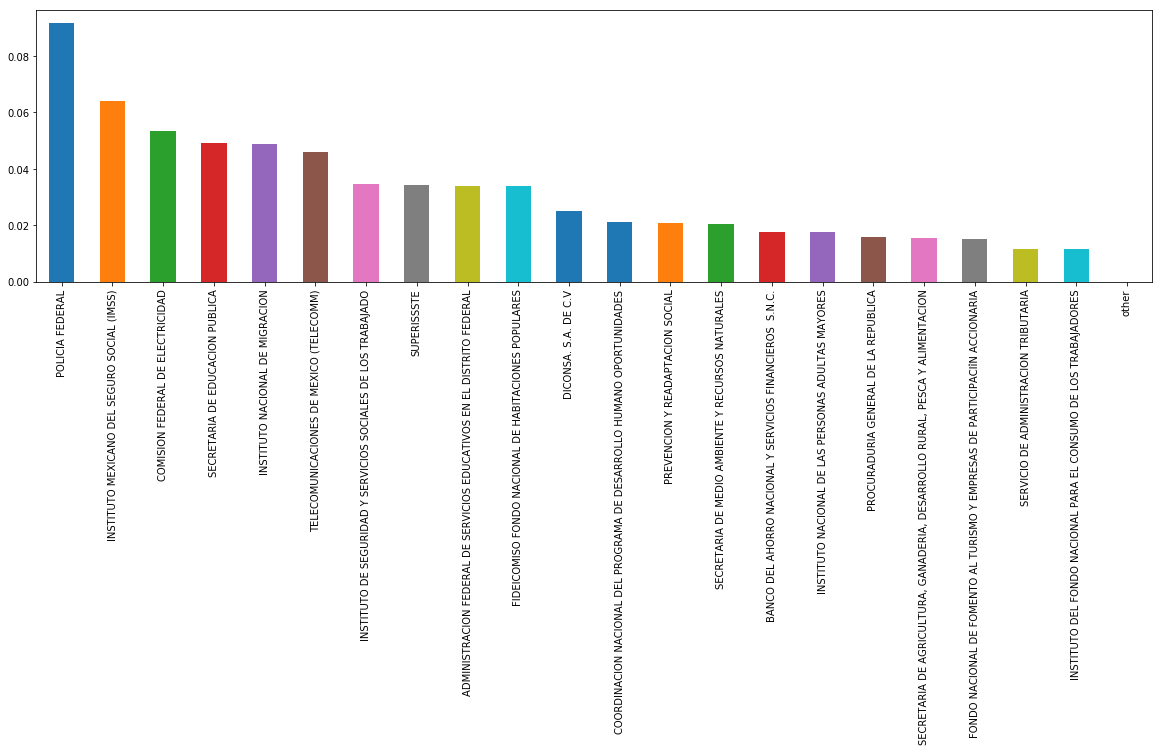

In [60]:
prob = df['Dependencia'].value_counts(normalize=True)
plt.rcParams['figure.figsize'] = [20, 5]
treshold = 0.01
mask = prob > treshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = 0
prob.plot(kind = 'bar')
plt.show

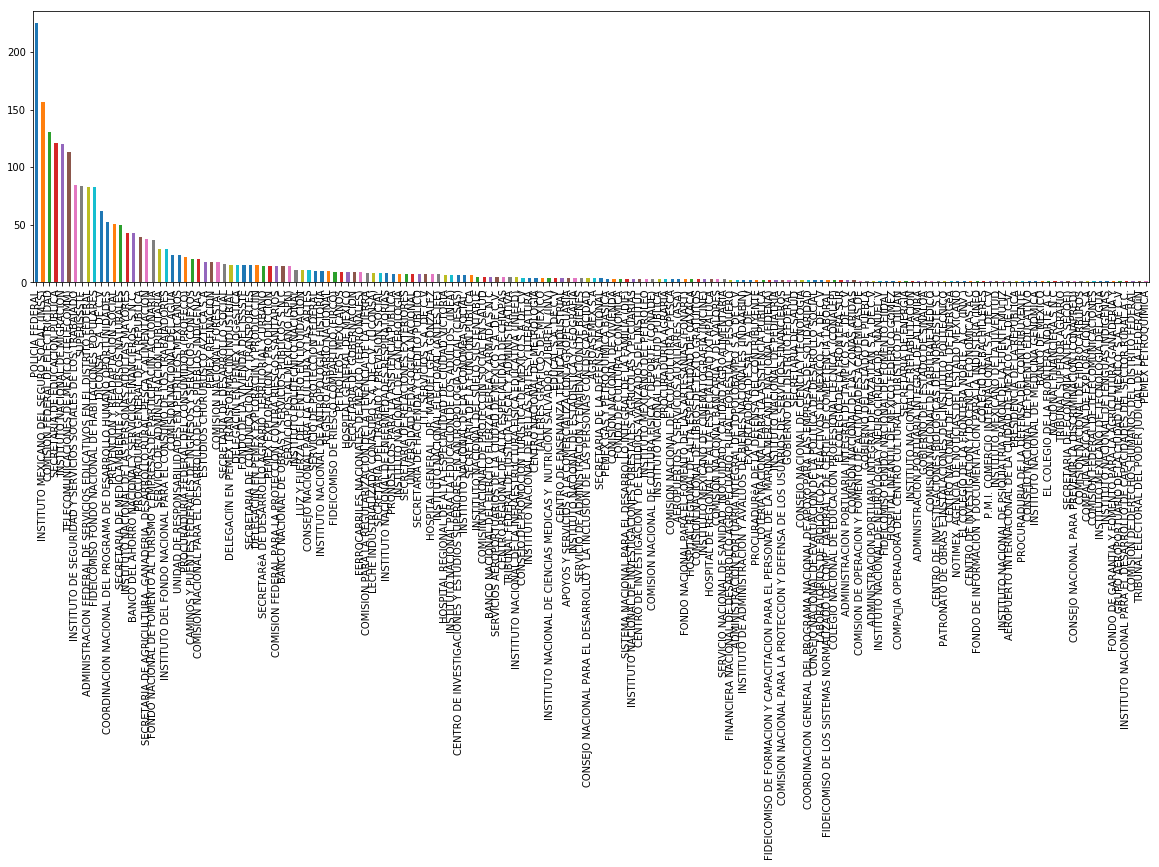

In [58]:
df['Dependencia'].value_counts().plot(kind = 'bar')

# Cruce Directorio de Proveedores y Contratistas sancionados (DSPC) - SFP

# Servidor público

### Descripción de tabla

In [31]:
df['Servidor Publico'].describe()

count                         2455
unique                        2179
top       CARLOS MACOUZET ZAMACONA
freq                            39
Name: Servidor Publico, dtype: object

### Top values

In [32]:
df['Servidor Publico'].value_counts().head(10)

CARLOS MACOUZET ZAMACONA                    39
CESAR ALBERTO VILLALON CUBILLO              37
SONIA HERNANDEZ GARCIA                      26
JOSE RAFAEL FERNANDEZ DE LARA Y OLIVARES     8
FERNANDO LOYO HERRERA                        6
EDUARDO ENRIQUEZ JIMENEZ                     6
ROSALVA SILVA VAZQUEZ                        6
ERNESTO GUEVARA ROSAS                        5
LUIS EFREN RAMIREZ GARCIA                    5
JOSE ROBERTO HERNANDEZ PANIAGUA              5
Name: Servidor Publico, dtype: int64

In [55]:
df['Servidor Publico'].value_counts(normalize=True).head(10)

CARLOS MACOUZET ZAMACONA                    0.015886
CESAR ALBERTO VILLALON CUBILLO              0.015071
SONIA HERNANDEZ GARCIA                      0.010591
JOSE RAFAEL FERNANDEZ DE LARA Y OLIVARES    0.003259
FERNANDO LOYO HERRERA                       0.002444
EDUARDO ENRIQUEZ JIMENEZ                    0.002444
ROSALVA SILVA VAZQUEZ                       0.002444
ERNESTO GUEVARA ROSAS                       0.002037
LUIS EFREN RAMIREZ GARCIA                   0.002037
JOSE ROBERTO HERNANDEZ PANIAGUA             0.002037
Name: Servidor Publico, dtype: float64

### Histograma

<function matplotlib.pyplot.show(*args, **kw)>

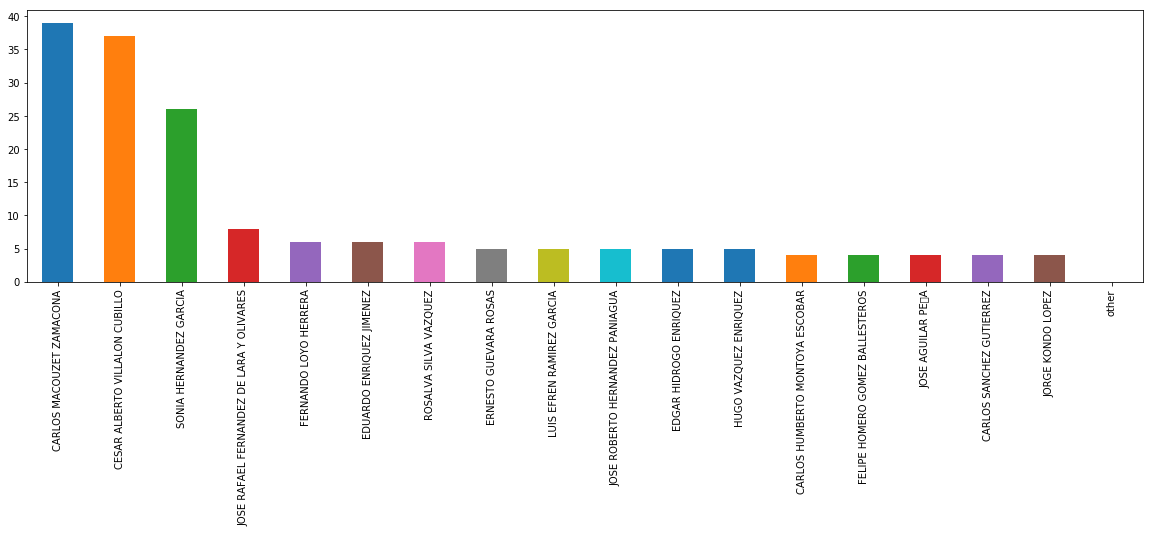

In [33]:
prob = df['Servidor Publico'].value_counts()
plt.rcParams['figure.figsize'] = [20, 5]
treshold = 3
mask = prob > treshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = 0
prob.plot(kind = 'bar')
plt.show

In [35]:
df[df['Servidor Publico'] == df['Servidor Publico'].value_counts().keys()[0]]

,Expediente,Fecha Resolucion,Servidor Publico,Autoridad,Dependencia,Sancion Impuesta,Inicio,Fin,Monto,Causa,Unnamed: 10
664,0027/2015,2016-12-30,CARLOS MACOUZET ZAMACONA,ORGANO INTERNO DE CONTROL,FIDEICOMISO FONDO NACIONAL DE HABITACIONES POP...,INHABILITACION,2017-01-31,2022-01-29,0.0,NEGLIGENCIA ADMINISTRATIVA,NaN
678,0028/2015,2016-12-30,CARLOS MACOUZET ZAMACONA,ORGANO INTERNO DE CONTROL,FIDEICOMISO FONDO NACIONAL DE HABITACIONES POP...,INHABILITACION,2017-04-24,2027-04-21,0.0,NEGLIGENCIA ADMINISTRATIVA,NaN
687,0029/2015,2016-12-30,CARLOS MACOUZET ZAMACONA,ORGANO INTERNO DE CONTROL,FIDEICOMISO FONDO NACIONAL DE HABITACIONES POP...,INHABILITACION,2017-04-17,2027-04-14,0.0,NEGLIGENCIA ADMINISTRATIVA,NaN
698,0030/2015,2016-12-30,CARLOS MACOUZET ZAMACONA,ORGANO INTERNO DE CONTROL,FIDEICOMISO FONDO NACIONAL DE HABITACIONES POP...,INHABILITACION,2017-03-29,2022-03-27,0.0,NEGLIGENCIA ADMINISTRATIVA,NaN
712,0032/2015,2016-12-30,CARLOS MACOUZET ZAMACONA,ORGANO INTERNO DE CONTROL,FIDEICOMISO FONDO NACIONAL DE HABITACIONES POP...,INHABILITACION,2017-05-17,2027-05-14,0.0,NEGLIGENCIA ADMINISTRATIVA,NaN
722,0033/2015,2016-12-30,CARLOS MACOUZET ZAMACONA,ORGANO INTERNO DE CONTROL,FIDEICOMISO FONDO NACIONAL DE HABITACIONES POP...,INHABILITACION,2017-05-05,2027-05-02,0.0,NEGLIGENCIA ADMINISTRATIVA,NaN
728,0034/2015,2016-12-30,CARLOS MACOUZET ZAMACONA,ORGANO INTERNO DE CONTROL,FIDEICOMISO FONDO NACIONAL DE HABITACIONES POP...,INHABILITACION,2017-05-26,2027-05-23,0.0,NEGLIGENCIA ADMINISTRATIVA,NaN
735,0035/2015,2017-07-11,CARLOS MACOUZET ZAMACONA,ORGANO INTERNO DE CONTROL,FIDEICOMISO FONDO NACIONAL DE HABITACIONES POP...,INHABILITACION,2017-07-20,2022-07-18,0.0,NEGLIGENCIA ADMINISTRATIVA,NaN
746,0037/2015,2017-06-30,CARLOS MACOUZET ZAMACONA,ORGANO INTERNO DE CONTROL,FIDEICOMISO FONDO NACIONAL DE HABITACIONES POP...,INHABILITACION,2017-07-06,2027-07-03,0.0,NEGLIGENCIA ADMINISTRATIVA,NaN
755,0038/2015,2017-09-11,CARLOS MACOUZET ZAMACONA,ORGANO INTERNO DE CONTROL,FIDEICOMISO FONDO NACIONAL DE HABITACIONES POP...,INHABILITACION,2017-09-15,2020-09-13,0.0,NEGLIGENCIA ADMINISTRATIVA,NaN
